Adem Baran Orhan

# What I did?

Compile takes too long time but I did not do any delete operation on dataset.
After doing the below parameter selection. Recommended for not getting RAM error.
max_df = 0.9, min_df = 2, max_features = 1000


- 1. Understanding the data: I gave 3 examples of keywords with freqeuncy to predict genre by description at WordCloud section.

- 2.Implement NB: I used Bag of Words (BoW) model which learns a vocabulary from all the documents, then models each document by counting the number of times each word appears. By using ngram_range parameters I used 2 options below.
  - • Unigram: The occurrences of words in a document (frequency of the word).
    
    • Bigram: The occurrences of two adjacent words in a document

  - I used CountVectorizer for obtaining BoW model.
Implementation is at Model section with and without stopword.

- 3. Error Analysis: I found a few misclassified books and comment on why they were hard to classified. Since there is 6 experiment total, I gave examples for some of them.
  - Examples at Unigram NB with Stopword- Bigram NB with Stopword- Unigram without Stopword section
  

# Importing Libraries

In [ ]:
import pandas as pd
import nltk
import re
import math
import random
import csv
from collections import Counter
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import string
from nltk import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('book_dataset_a2.csv',sep = '\t')

In [ ]:
df.head()

,title,author,description,coverImg,genre
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,https://i.gr-assets.com/images/S/compressed.ph...,Fantasy
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
4,Twilight,Stephenie Meyer,About three things I was absolutely positive.\...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult


Since for main part we do not need covering column. So dropping it at below.

In [ ]:
df = df.drop(["coverImg"], axis=1) 

In [ ]:
df.tail(10)

,title,author,description,genre
21069,Sweet Possession,J. Daniels (Goodreads Author),There is an alternate cover edition for this A...,Romance
21070,The Natural Way of Things,Charlotte Wood,Two women awaken from a drugged sleep to find ...,Fiction
21071,Arafel's Saga,C.J. Cherryh (Goodreads Author),"Journey to a transitional time in the world, a...",Fantasy
21072,Theodosia and the Last Pharaoh,R.L. LaFevers (Goodreads Author),"In this fourth book in the series, Theodosia s...",Fantasy
21073,Undetected,Anna Hackett (Goodreads Author),Darcy Ward has sold her soul to the devil. Oka...,Romance
21074,Elemental,Kim Richardson (Goodreads Author),When seventeen-year-old Kara Nightingale is su...,Fantasy
21075,Unbelievable,Sherry Gammon (Goodreads Author),Lilah Lopez Dreser's in town to take care of u...,Romance
21076,Anasazi,Emma Michaels,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery
21077,Marked,Kim Richardson (Goodreads Author),--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Fantasy
21078,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,Fiction


In [ ]:
df.shape

(21079, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21079 entries, 0 to 21078
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        21079 non-null  object
 1   author       21079 non-null  object
 2   description  21079 non-null  object
 3   genre        21079 non-null  object
dtypes: object(4)
memory usage: 658.8+ KB


For look the data more detailed printing the count of genres.

Also printing it as a table.

Below count part tells us the reason on confusıin matrixs.
Why we have higher misclassified genres mostly for fiction and fantasy is because data has many of them. Making equal genres is not important for the problem so not considered any process.

In [ ]:
df['genre'].value_counts()

Fiction            4856
Fantasy            4743
Young Adult        2865
Romance            2771
Mystery            1791
Science Fiction    1245
Classics            876
History             751
Horror              747
Thriller            434
Name: genre, dtype: int64

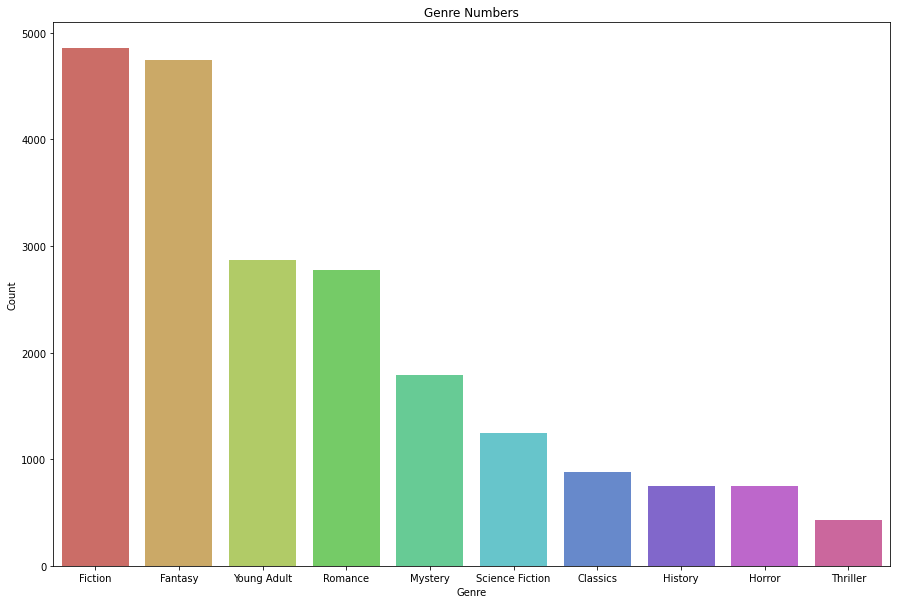

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['genre'].value_counts().index,y=df['genre'].value_counts(), palette = 'hls')
plt.title('Genre Numbers')
plt.xlabel('Genre')
plt.ylabel('Count');

In [ ]:
df.isnull().sum()

title          0
author         0
description    0
genre          0
dtype: int64

We have no null value for dataframe.

# Preprocessing and Cleaning for Text

For cleaner function we used regex for most of time functions.
Further info about regex : https://en.wikipedia.org/wiki/Regular_expression

In [ ]:
def cleaner (text):
    text = str(text).lower() # Lowering the case
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # for punctation on text
    text = re.sub('\n', '', text) # for next line characters if any
    text = re.sub('https?://\S+|www\.\S+', '', text) # for links 
    text = re.sub('<.*?>+',' ',text) #htmltags
    text = re.sub('\w*\d\w*', '', text) # Removing the words with numbers
    text = re.sub('\[.*?\]', '', text) #Remove any text in the square brackets
    text = text.encode(encoding="ascii", errors="ignore") #for ascii, thre is symbols in data
    text = text.decode()
    text = " ".join([word for word in text.split()])# cleaning the text to remove extra whitespace 
    


    return text

In [ ]:
def stopword_func(text):
    text = word_tokenize(text)
    tw = [word for word in text if not word in stopwords.words('english')]
    text = (" ").join(tw)
    return text

Now it is time for clean the features with includes text.


In [ ]:
df['title'] =df['title'].apply(cleaner)
df['author'] =df['author'].apply(cleaner)
df['description'] =df['description'].apply(cleaner)

In [ ]:
df.head()

,title,author,description,genre
0,the hunger games,suzanne collins,winning means fame and fortunelosing means cer...,Young Adult
1,harry potter and the order of the phoenix,jk rowling mary grandpr illustrator,there is a door at the end of a silent corrido...,Fantasy
2,to kill a mockingbird,harper lee,the unforgettable novel of a childhood in a sl...,Classics
3,pride and prejudice,jane austen anna quindlen introduction,alternate cover edition of isbn its immediate ...,Classics
4,twilight,stephenie meyer,about three things i was absolutely positivefi...,Young Adult


For stopwords on text

In [ ]:
def stemmer(text):
    new_text=[]
    stemmer=PorterStemmer()
    text=word_tokenize(text)
    for word in text:
        new_text.append(stemmer.stem(word))
    return ' '.join(new_text)

We are removing stopwords and lemmatizing the description and title part since we already cleaned the other features which is author. And we do not need to remove stopwords from this feature because of it is unique.

Tokenization is breaking data into smaller units called tokens. 
Like splitting sentences to word

We do not need stopwords druing NLP usage. So we need to get rid of stopwords from ready to use English library.

In [ ]:
df["description"] = df["description"].apply(stopword_func)
df["title"] = df["title"].apply(stopword_func)

With stemmer we are getting getting the root of a word.
The stem of a word is created by removing the prefix or suffix of a word.


In [ ]:
df["description"] = df["description"].apply(stemmer)
df["title"] = df["title"].apply(stemmer)


In [ ]:
df.head()

,title,author,description,genre
0,hunger game,suzanne collins,win mean fame fortunelos mean certain deathth ...,Young Adult
1,harri potter order phoenix,jk rowling mary grandpr illustrator,door end silent corridor haunt harri pottter d...,Fantasy
2,kill mockingbird,harper lee,unforgett novel childhood sleepi southern town...,Classics
3,pride prejudic,jane austen anna quindlen introduction,altern cover edit isbn immedi success pride pr...,Classics
4,twilight,stephenie meyer,three thing absolut positivefirst edward vampi...,Young Adult


# Wordclouding
for giving examples of specific keywords that may be useful, together with statistics on how
often they appear in the book description may help to predict its genre.

In [ ]:
df23=' '.join(df[df['genre']=='Fiction']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Novel', 2755), ('Life', 2688), ('One', 2657)]


In [ ]:
df23=' '.join(df[df['genre']=='Romance']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Love', 2654), ('One', 2234), ('Life', 2140)]


In [ ]:
df23=' '.join(df[df['genre']=='Mystery']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Murder', 998), ('One', 992), ('Find', 777)]


In [ ]:
df23=' '.join(df[df['genre']=='Science Fiction']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Human', 719), ('World', 710), ('One', 665)]


In [ ]:
df23=' '.join(df[df['genre']=='History']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Histori', 748), ('War', 610), ('World', 495)]


In [ ]:
df23=' '.join(df[df['genre']=='Horror']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('One', 409), ('Stori', 311), ('New', 298)]


In [ ]:
df23=' '.join(df[df['genre']=='Thriller']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('One', 351), ('New', 223), ('Life', 200)]


Classics Keywords

Classics WORD CLOUD


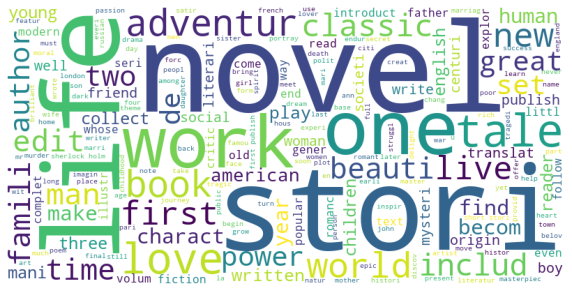

In [ ]:
text=' '.join(df[df['genre']=='Classics']['description'])
print("Classics WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df23=' '.join(df[df['genre']=='Classics']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Stori', 503), ('Novel', 475), ('One', 354)]


Young Adult Keywords

YOUNG ADULT WORD CLOUD


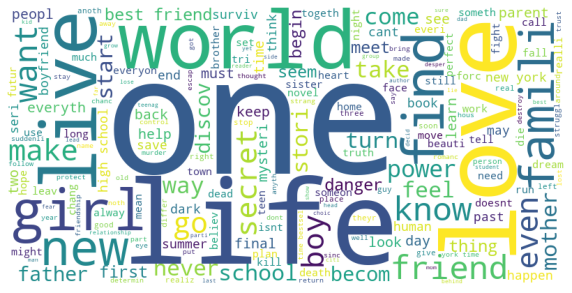

In [ ]:
text=' '.join(df[df['genre']=='Young Adult']['description'])
print("YOUNG ADULT WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df23=' '.join(df[df['genre']=='Young Adult']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('One', 1748), ('Life', 1497), ('New', 1447)]


Fantasy Keywords

Fantasy WORD CLOUD


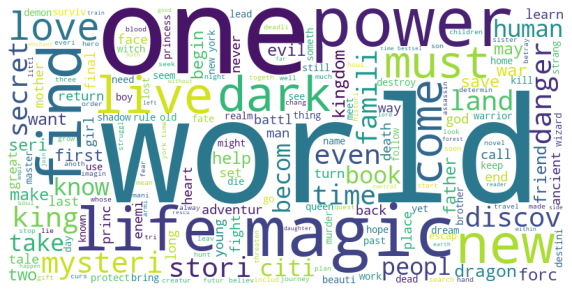

In [ ]:
text=' '.join(df[df['genre']=='Fantasy']['description'])
print("Fantasy WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Fantasy Genre Keyword

In [ ]:
df23=' '.join(df[df['genre']=='Fantasy']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('World', 2788), ('One', 2541), ('Magic', 2193)]


**For fanstasy genre predicting genre by most used keywords in description is not feasible because "one" keyword is also most used keyword also at Young Adult genre** 
Also you can see above from three example of wordcloud "Life" "keyword is always most used keywords.

But magic, power can help to predict it is fantasy.

# Encoding Genre features

Since we have categorical values on genre column encoding them to numerical values.

In [ ]:
encode = LabelEncoder().fit(df['genre'])
df['genre'] = encode.transform(df['genre'])

In [ ]:
df.head()

,title,author,description,genre
0,hunger game,suzanne collins,win mean fame fortunelos mean certain deathth ...,9
1,harri potter order phoenix,jk rowling mary grandpr illustrator,door end silent corridor haunt harri pottter d...,1
2,kill mockingbird,harper lee,unforgett novel childhood sleepi southern town...,0
3,pride prejudic,jane austen anna quindlen introduction,altern cover edit isbn immedi success pride pr...,0
4,twilight,stephenie meyer,three thing absolut positivefirst edward vampi...,9



Classics: 0

Fantasy: 1

Fiction: 2         
  
History: 3  

Horror: 4  

Mystery : 5 

Romance: 6        
        
Science Fiction : 7   
        
Thriller: 8 

Young Adult: 9


# Model

Splitting data and appliying scikit-learn library CountVectorizer to description column

--------

 Naive Bayes classifier for multinomial models.

    The multinomial Naive Bayes classifier is suitable for classification with
    discrete features (e.g., word counts for text classification). The
    multinomial distribution normally requires integer feature counts. However,
    in practice, fractional counts such as tf-idf may also work.

In [ ]:
class MultinomialNB:
    """

    alpha value for Laplace smoothing to get better result in text classfying.
    """

    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.fitted = False


    def fit(self, X, y):
        #For counting the y and classes product of transposed labels

        self.feature_count += np.dot(self.bin_labels.T, X)
        self.class_count += self.bin_labels.sum(axis=0)

        #Using alpha t smoothing
        """
        The idea behind Laplace Smoothing:  To ensure that our posterior probabilities are never zero, we add 1 to the numerator, 
        and we add k to the denominator. So, in the case that we don’t have a particular ingredient in our training set, 
        the posterior probability comes out to 1 / N + k instead of zero.
        """
        if self.alpha > 0.0:
            self.feature_count += self.alpha
            smoothed_class_count = self.feature_count.sum(axis=1)

            # get conditional log probabilities
            self.feat_log_probs = (np.log(self.feature_count) -
                                   np.log(smoothed_class_count.reshape(-1, 1)))
        else:
            self.feat_log_probs = np.log(
                                    self.feature_count /
                                    self.feature_count
                                    .sum(axis=1)
                                    .reshape(-1, 1)
                                  )

        
        self.class_log_priors = (np.log(self.class_count) -
                                 np.log(self.class_count
                                 .sum(axis=0)
                                 .reshape(-1, 1)))
        #compute the log probabilities to prevent numerical underflow when calculating multiplicative probabilities
        self.fitted = True

    def scores(self, X):
      return np.dot(X, self.feat_log_probs.T) + self.class_log_priors

    def predict(self, X):
      predictions = self.classes[np.argmax(scores(X), axis=1)]
      return predictions


## Unigram NB with Stopword

In [ ]:
bagofword = CountVectorizer(ngram_range=(1,1),max_df = 0.9, min_df = 2, max_features = 1000).fit_transform(df['description'])
bagofword

<21079x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 847015 stored elements in Compressed Sparse Row format>

In [ ]:
test = df['genre']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bagofword, test, test_size = 0.2,random_state = 42,stratify= test)

In [ ]:
X_train[0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16863, 1000) (4216, 1000) (16863,) (4216,)


In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
score1 = metrics.accuracy_score(y_test, mnb_pred)

print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 64.42%


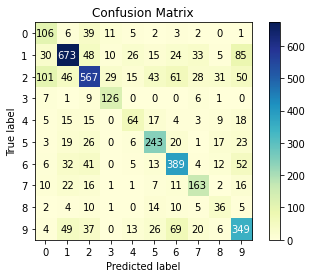

In [ ]:
plot_confusion_matrix(y_test, mnb_pred, cmap= 'YlGnBu')

Classics: 0

Fantasy: 1

Fiction: 2         
  
History: 3  

Horror: 4  

Mystery : 5 

Romance: 6        
        
Science Fiction : 7   
        
Thriller: 8 

Young Adult: 9


In [ ]:
y_test

10763    9
12568    1
2234     6
14539    6
5827     7
        ..
5308     2
14477    5
5428     5
5553     0
5577     2
Name: genre, Length: 4216, dtype: int64

In [ ]:
y_test = y_test.to_numpy()


In [ ]:
for i in range(5):
  if mnb_pred[i] != y_test[i]:
    print("--------------------")
    print("Index: ",i)
    print("misclassified genre")
    print("Predicted:",mb_pred[i] )
    print("True:",y_test[i])
    print("--------------------")
  

--------------------
Index:  0
misclassified genre
Predicted: 6
True: 9
--------------------
--------------------
Index:  2
misclassified genre
Predicted: 9
True: 6
--------------------


At index 0 we have the 10763 th book. Lets look what we have at the index 10763

If you wonder how we got 10763 please look at 3 cells above.

In [ ]:
df.loc[10763]

title                                           heart bodi world
author                              deb caletti goodreads author
description    everyth taken els runso that annabel doessh ru...
genre                                                          9
Name: 10763, dtype: object


Romance: 6        
        
Young Adult: 9     

**Predicted as Romance**

Before looking at the provement in real life it makes sense that young adult predicted as romance. They are close genres for some books in real life.

Reason is understandable after looking the word cloud  for Romance and Young Adult genre.

Their  most frequent 3 words are 2/3 same.
They have similar most frequent words such as:

- one 
- life
- live
- love 


In [ ]:
df23=' '.join(df[df['genre']=='Young Adult']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('One', 1748), ('Life', 1497), ('New', 1447)]


In [ ]:
df23=' '.join(df[df['genre']=='Romance']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Love', 2654), ('One', 2234), ('Life', 2140)]


Romance ADULT WORD CLOUD


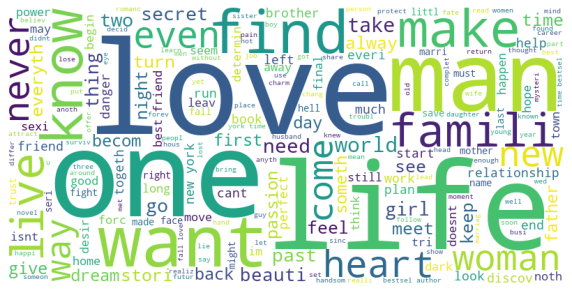

In [ ]:
text=' '.join(df[df['genre']==6]['description'])
print("Romance ADULT WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Young Adult WORD CLOUD


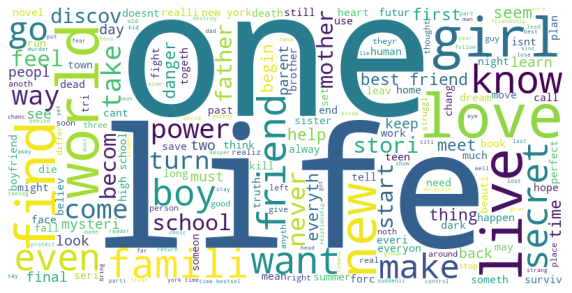

In [ ]:
text=' '.join(df[df['genre']==9]['description'])
print("Young Adult WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Bigram NB with Stopword

In [ ]:
count_vec_big = CountVectorizer(ngram_range=(2,2),max_df = 0.9, min_df = 2, max_features = 1000)
bagofword_vec = count_vec_big.fit_transform(df['description'])
bagofword_vec

<21079x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 81508 stored elements in Compressed Sparse Row format>

In [ ]:
test = df['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec, test, test_size = 0.2,random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16863, 1000) (4216, 1000) (16863,) (4216,)


In [ ]:
X_train[0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
mb = MultinomialNB()
mb.fit(X_train, y_train)
mb_pred = mb.predict(X_test)
score1 = metrics.accuracy_score(y_test, mb_pred)

print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 44.76%


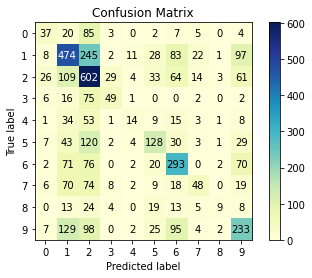

In [ ]:
plot_confusion_matrix(y_test, mb_pred, cmap= 'YlGnBu')

Classics: 0

Fantasy: 1

Fiction: 2         
  
History: 3  

Horror: 4  

Mystery : 5 

Romance: 6        
        
Science Fiction : 7   
        
Thriller: 8 

Young Adult: 9


In [ ]:
y_test

3921     8
16736    7
6753     9
16355    1
2862     2
        ..
16189    1
5576     2
20163    1
1776     2
16277    6
Name: genre, Length: 4216, dtype: int64

In [ ]:
y_test = y_test.to_numpy()


In [ ]:
for i in range(5):
  if mb_pred[i] != y_test[i]:
    print("--------------------")
    print("Index: ",i)
    print("misclassified genre")
    print("Predicted:",mb_pred[i] )
    print("True:",y_test[i])
    print("--------------------")
  

--------------------
Index:  0
misclassified genre
Predicted: 6
True: 8
--------------------
--------------------
Index:  1
misclassified genre
Predicted: 1
True: 7
--------------------
--------------------
Index:  2
misclassified genre
Predicted: 1
True: 9
--------------------
--------------------
Index:  4
misclassified genre
Predicted: 6
True: 2
--------------------


At index 1 we have the 16736 th book. Lets look what we have at the index 16736    

In [ ]:
df.loc[16736]

title                                                           
author                         mike a lancaster goodreads author
description    brave new world far futur peopl longer know be...
genre                                            Science Fiction
Name: 16736, dtype: object



 Science Fiction: 7
 
Fantasy : 1        

**Predicted as Fantasy**

Since we have 44% accuracy we can expect not sensible predictions. 

Before looking at the provement in real life it makes sense that science fiction predicted as fantasy. They are close genres for some books.

Lets look at wordcloud for similar words that they can effect the results.

In this case we have many similar frequent words.

2 out of 3 most frequrnt words are similar for genres.
One, world

They have similar most frequent words such as:
- world
- love
- famili
- find
- one 
- life
- live



Fantasy WORD CLOUD


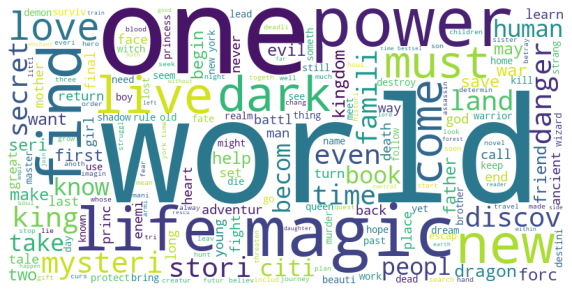

In [ ]:
text=' '.join(df[df['genre']=='Fantasy']['description'])
print("Fantasy WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df23=' '.join(df[df['genre']=='Fantasy']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('World', 2788), ('One', 2541), ('Magic', 2193)]


In [ ]:
df23=' '.join(df[df['genre']=='Science Fiction']['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('Human', 719), ('World', 710), ('One', 665)]


## TFIDF with Stopword

In [ ]:
X=df['description']
y=df['genre'].values

Used stratify because variable y is a categorical variable with values 0 to 9 and there are diffreent amount of 0,1,...9. stratify=y will make sure that your random split has same amount of 0,1,....9

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state= 42,stratify=y)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, max_features= 10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(xtrain_tfidf, y_train)
nb_y_pred = model.predict(xtest_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)

print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 62.12%


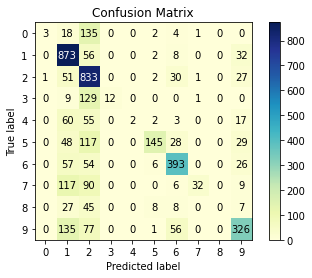

In [ ]:
plot_confusion_matrix(y_test, nb_y_pred, cmap= 'YlGnBu')

Classics: 0

Fantasy: 1

Fiction: 2         
  
History: 3  

Horror: 4  

Mystery : 5 

Romance: 6        
        
Science Fiction : 7   
        
Thriller: 8 

Young Adult: 9


In [ ]:
print(xtrain_tfidf.shape, xtest_tfidf.shape, y_train.shape, y_test.shape,nb_y_pred.shape)

(16863, 10000) (4216, 10000) (16863,) (4216,) (4216,)


# Non stopword dataframe

In [ ]:
df2 = pd.read_csv('book_dataset_a2.csv',sep = '\t')

In [ ]:
df2 = df2.drop(["coverImg"], axis=1) 

In [ ]:
df2['title'] =df2['title'].apply(cleaner)
df2['author'] =df2['author'].apply(cleaner)
df2['description'] =df2['description'].apply(cleaner)

In [ ]:
df2["description"] = df2["description"].apply(stemmer)
df2["title"] = df2["title"].apply(stemmer)

In [ ]:
encode = LabelEncoder().fit(df2['genre'])
df2['genre'] = encode.transform(df2['genre'])

## Unigram NB without Stopword

In [ ]:
count_vec_uni = CountVectorizer(ngram_range=(1,1),max_df = 0.9, min_df = 2, max_features = 1000)
bagofword_vec = count_vec_uni.fit_transform(df2['description'])
bagofword_vec

<21079x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1274798 stored elements in Compressed Sparse Row format>

In [ ]:
test = df2['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec, test, test_size = 0.2,random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16863, 1000) (4216, 1000) (16863,) (4216,)


In [ ]:
mb = MultinomialNB()
mb.fit(X_train, y_train)
mb_pred = mb.predict(X_test)
score1 = metrics.accuracy_score(y_test, mb_pred)

print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 63.16%


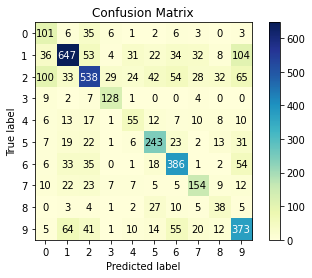

In [ ]:
plot_confusion_matrix(y_test, mb_pred, cmap= 'YlGnBu')

Classics: 0

Fantasy: 1

Fiction: 2         
  
History: 3  

Horror: 4  

Mystery : 5 

Romance: 6        
        
Science Fiction : 7   
        
Thriller: 8 

Young Adult: 9


In [ ]:
y_test

3921     8
16736    7
6753     9
16355    1
2862     2
        ..
16189    1
5576     2
20163    1
1776     2
16277    6
Name: genre, Length: 4216, dtype: int64

In [ ]:
y_test = y_test.to_numpy()


In [ ]:
for i in range(5):
  if mb_pred[i] != y_test[i]:
    print("--------------------")
    print("Index: ",i)
    print("misclassified genre")
    print("Predicted:",mb_pred[i] )
    print("True:",y_test[i])
    print("--------------------")
  

--------------------
Index:  0
misclassified genre
Predicted: 5
True: 8
--------------------
--------------------
Index:  3
misclassified genre
Predicted: 6
True: 1
--------------------
--------------------
Index:  4
misclassified genre
Predicted: 9
True: 2
--------------------


At index 0 we have the 3921 th book. Lets look what we have at the index 3921

In [ ]:
df.loc[3921]

title                                            lock everi door
author                              riley sager goodreads author
description    visitor night spent away apart disturb resid r...
genre                                                   Thriller
Name: 3921, dtype: object

Mystery : 5 

Thriller: 8  

**Predicted as Mystery**

Since we have stopwords for description of books classfying genres is harder as you can see from wordcloud.
-ha,hi,wa can be example for misclassified genres

MOst common words are same as The,a,and since we have stopwords in our data.

Other than that:

They have similar most frequent words such as:


- hi 
- ha
- one
- wa



Mystery ADULT WORD CLOUD


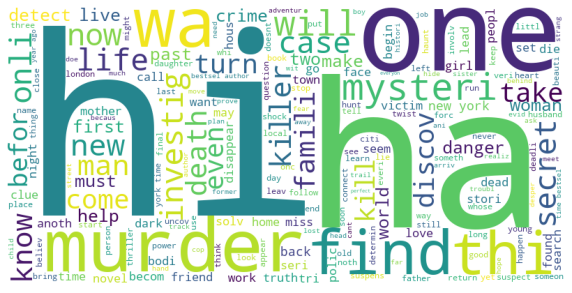

In [ ]:
text=' '.join(df2[df2['genre']==5]['description'])
print("Mystery ADULT WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df23=' '.join(df2[df2['genre']==5]['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('The', 14650), ('A', 8748), ('And', 7280)]


Thriller ADULT WORD CLOUD


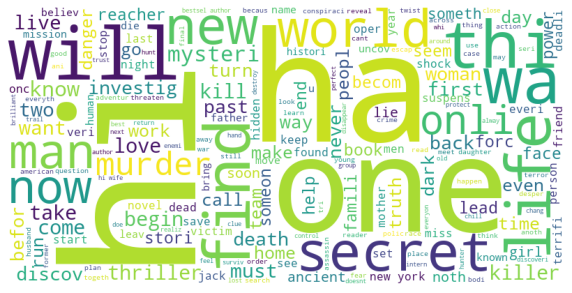

In [ ]:
text=' '.join(df2[df2['genre']==8]['description'])
print("Thriller ADULT WORD CLOUD")
plt.figure(figsize=(10,10))
wordcloud=WordCloud(height=400,width=800,background_color='white',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df23=' '.join(df2[df2['genre']==8]['description'])
list1 = []
list1 = df23.split(' ')
c = Counter(i.capitalize() for x in list1 for i in x.split())
print(c.most_common(3))

[('The', 3980), ('A', 2514), ('And', 2010)]


## Bigram NB without Stopword

In [ ]:
count_vec_big = CountVectorizer(ngram_range=(2,2),max_df = 0.9, min_df = 2, max_features = 1000)
bagofword_vec = count_vec_big.fit_transform(df2['description'])
bagofword_vec

<21079x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 497178 stored elements in Compressed Sparse Row format>

In [ ]:
test = df2['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec, test, test_size = 0.2,random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16863, 1000) (4216, 1000) (16863,) (4216,)


In [ ]:
mb = MultinomialNB()
mb.fit(X_train, y_train)
mb_pred = mb.predict(X_test)
score1 = metrics.accuracy_score(y_test, mb_pred)

print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 50.12%


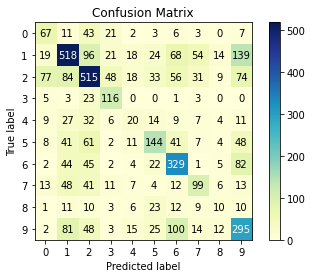

In [ ]:
plot_confusion_matrix(y_test, mb_pred, cmap= 'YlGnBu')

## TFIDF without Stopword

In [ ]:
X=df2['description']
y=df2['genre']

Used stratify because variable y is a categorical variable with values 0 to 9 and there are diffreent amount of 0,1,...9. stratify=y will make sure that your random split has same amount of 0,1,....9

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state= 42,stratify=y)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, max_features= 10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(xtrain_tfidf, y_train)
nb_y_pred = model.predict(xtest_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)

print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 61.81%


Classics: 0

Fantasy: 1

Fiction: 2         
  
History: 3  

Horror: 4  

Mystery : 5 

Romance: 6        
        
Science Fiction : 7   
        
Thriller: 8 

Young Adult: 9

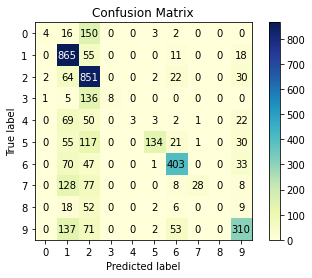

In [ ]:
plot_confusion_matrix(y_test, nb_y_pred, cmap= 'YlGnBu')

# Accuracy of 6 experiment

| Methods     	| Stop-Words 	| Accuracy (%) 	|
|-------------	|------------	|:------------:	|
| Bow-unigram 	| Yes        	|      64,42        	|
| Bow-unigram 	| No         	|         63,16     	|
| Bow-bigram  	| Yes        	|           44,76   	|
| Bow-bigram  	| No         	|       50,12       	|
| TF-IDF      	| Yes        	|        62,12      	|
| TF-IDF      	| No         	|       61,81       	|

**Commnets about accuracy**
In the project we are not expected to have high accuracy.
For high accuracy we can test some different values for parameters at the functions like CountVectorizer. 

max_df = 0.9, min_df = 2, max_features = 1000 is selected for less computation. If I had higher computational power parameters can be selected for more accurate models.

I used stemmer for the decription part but maybe lemmatize will give more accurate models. Again my computational power was not enough for lemmatize.

We have less accurate results for bigram compared to unigram, tf-idf.

As I found a comment about comparing the ngrams,
the implemented classification flow would not construct a vector for yet unseen ngrams. This may reduce the information available for the classifier during training and inference, if working a bigram model end-to-end is more likely to yield unknown ngrams than a unigram end-to-end model as found from github discussion.(https://github.com/facebookresearch/fastText/issues/585)
